In [1]:
# KNN Classification
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
zoo_data=pd.read_csv("Zoo.csv")
zoo_data

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [3]:
zoo_data.type.unique()

array([1, 4, 2, 7, 6, 5, 3], dtype=int64)

In [4]:
#doubt: do i need to assume type 1: is mammal tpye2: bird/reptile/fish/amphibian

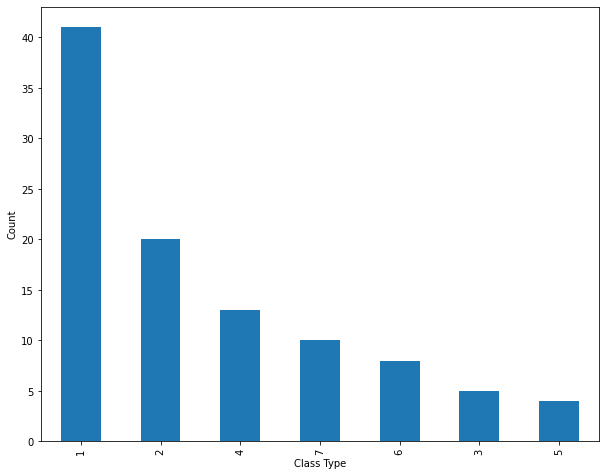

In [5]:
plt.figure(figsize=(10,8));
zoo_data.type.value_counts().plot(kind="bar");
plt.xlabel('Class Type');
plt.ylabel("Count");
plt.plot();

In [6]:
X = zoo_data.iloc[:, 1: 17].values

In [7]:
Y = zoo_data.iloc[:, 17].values

In [8]:
kfold = KFold(n_splits=20) 

In [9]:
model = KNeighborsClassifier(n_neighbors=15) 
results = cross_val_score(model, X, Y, cv=kfold) 

In [10]:
print(results.mean())

0.76


In [11]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [12]:
#trying k value 1 to 40 and for a random range GridSearchCV will be better
n_neighbors = numpy.array(range(1,20)) 
param_grid = dict(n_neighbors=n_neighbors)

In [15]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

C:\Users\Dr. Nitin\python\lib\site-packages\sklearn\model_selection\_split.py:670: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [16]:
print(grid.best_score_)
print(grid.best_params_)

0.96
{'n_neighbors': 1}
